In [26]:
! pip install -q kaggle

In [27]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [28]:
! cp kaggle.json ~/.kaggle/

In [29]:
! chmod 600 ~/.kaggle/kaggle.json

In [30]:
! kaggle competitions download decoding-the-human-brain

train_01_06.zip: Skipping, found more recently modified local copy (use --force to force download)
random_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train_07_12.zip: Skipping, found more recently modified local copy (use --force to force download)
train_13_16.zip: Skipping, found more recently modified local copy (use --force to force download)
test_17_23.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
! unzip train_01_06.zip

Archive:  train_01_06.zip
replace data/train_subject01.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [32]:
! unzip train_13_16.zip

Archive:  train_13_16.zip
replace data/train_subject13.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
! unzip train_07_12.zip

Archive:  train_07_12.zip
replace data/train_subject07.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
! unzip test_17_23.zip

Archive:  test_17_23.zip
replace data/test_subject17.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
import scipy.io
train_subject1 = scipy.io.loadmat('data/train_subject01.mat')
x=train_subject1['X']

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

f_sample = 40000 
f_pass = 4000
f_stop = 8000  
fs = 0.5
wp = f_pass/(f_sample/2)  
ws = f_stop/(f_sample/2) 
Td = 1  
g_pass = 0.5 
g_stop = 40  
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d,x )
print(response)

[[[ 2.44259767e-14  2.46976927e-13  1.08422965e-12 ...  6.02115882e-12
    8.56677620e-13  5.08450504e-13]
  [-1.06512609e-15 -4.95111029e-15  1.67083117e-14 ... -3.71061793e-12
   -3.55303879e-12 -2.56521101e-12]
  [-1.45653983e-15 -1.44331707e-14 -6.31989856e-14 ...  1.10661173e-13
    6.48251435e-14  3.89245079e-14]
  ...
  [ 3.20966244e-14  2.96017583e-13  1.18289165e-12 ... -1.75108185e-12
   -1.53776025e-12 -3.42934355e-12]
  [-2.22434036e-14 -2.56263445e-13 -1.34218356e-12 ... -8.68542989e-12
   -2.64300915e-12 -1.89719077e-12]
  [-5.48666734e-17 -3.88276785e-16 -9.44469924e-16 ...  1.27004589e-14
   -1.35106331e-14 -2.93642357e-14]]

 [[-3.00171914e-16 -2.68886317e-14 -2.24700745e-13 ... -8.80829653e-12
   -7.46145222e-12 -1.15523531e-12]
  [ 2.64851699e-14  2.41797044e-13  9.46761177e-13 ...  2.53816963e-12
   -1.65501186e-12 -3.90132021e-12]
  [ 1.93357250e-15  1.94004644e-14  8.62043458e-14 ... -5.71375784e-13
   -4.01698820e-13 -1.75721847e-13]
  ...
  [ 4.86612810e-14  4.8

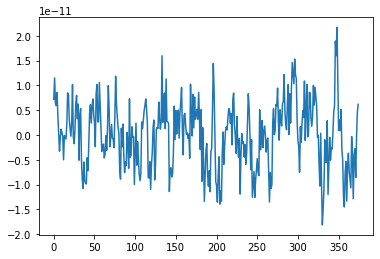

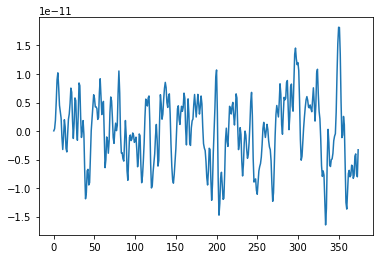

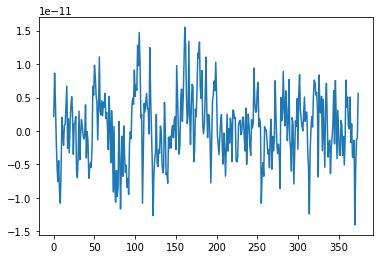

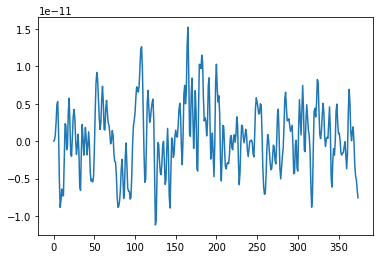

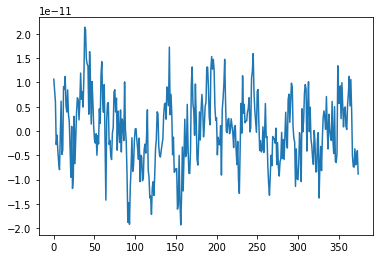

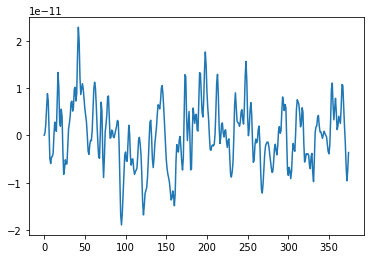

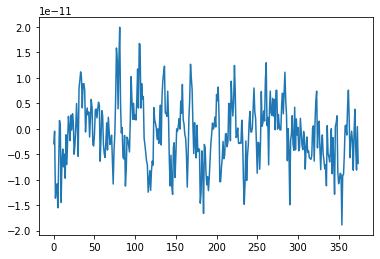

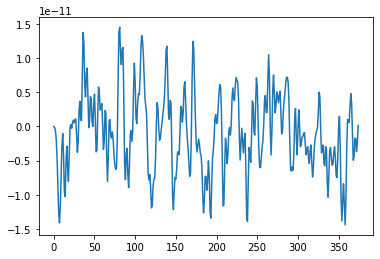

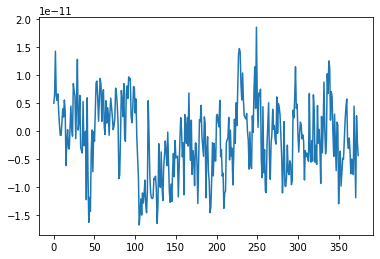

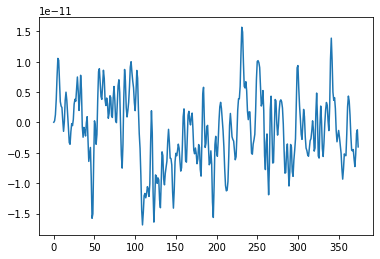

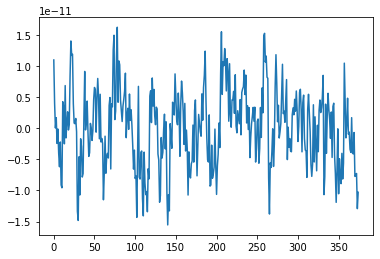

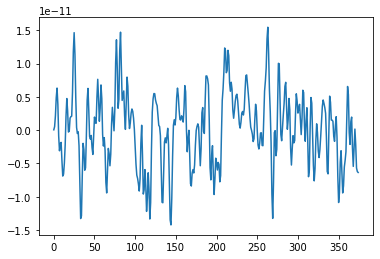

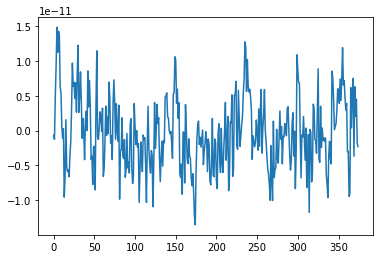

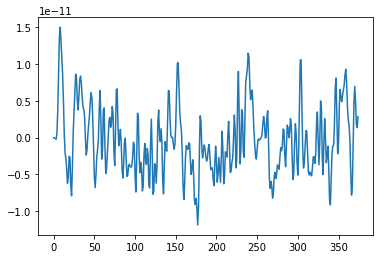

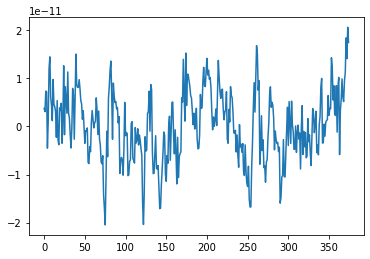

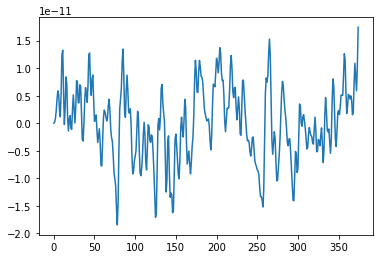

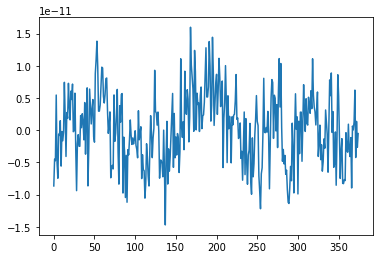

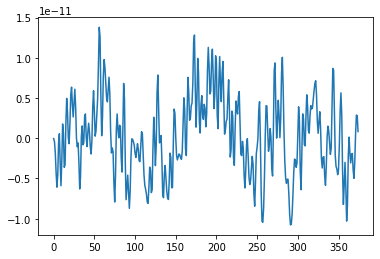

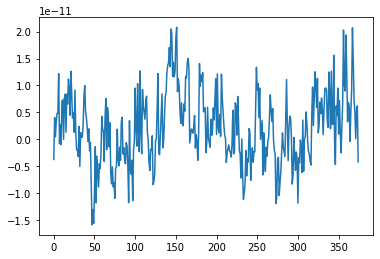

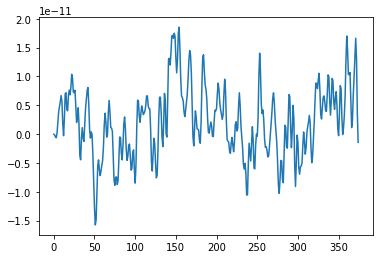

In [37]:
for i in range(10):
    plt.plot([x for x in range(375)],x[i,7])
    plt.show()
    plt.plot([x for x in range(375)],response[i,7])
    plt.show()


In [38]:
def loadData(path):
  train_subject = scipy.io.loadmat(path)
  x = signal.lfilter(c, d,train_subject['X'])
  x=scipy.signal.decimate(x,8)
  y=train_subject['y']
  return x,y
  

In [39]:
import scipy.io
paths=['data/train_subject01.mat','data/train_subject02.mat','data/train_subject03.mat','data/train_subject04.mat','data/train_subject05.mat','data/train_subject06.mat']
X_train=[]
Y_train=[]

for i in range(6):
  x,y =loadData(paths[i])
  X_train.append(x)
  Y_train.append(y)


#y_train= conc
#band pass
#decimate
#2d arr

In [71]:
x_train=np.vstack(X_train)
y_train=np.concatenate(Y_train)

print(x_train)
print(Y_train)

[[[-1.52075212e-13 -1.66655198e-12 -3.82015150e-12 ... -1.71203592e-12
   -2.39597932e-12  5.72221266e-13]
  [-3.30570418e-13 -2.80253952e-12 -2.93467756e-13 ...  9.67490485e-13
   -1.75572331e-12 -5.00288497e-12]
  [ 7.12464341e-15 -8.93868936e-14 -6.87074013e-14 ... -5.15428438e-13
   -2.15238053e-13 -1.77052644e-13]
  ...
  [ 1.21942820e-13 -6.55280188e-12  1.23260232e-12 ... -4.79162027e-12
   -1.43699634e-12  1.82822394e-12]
  [-3.10743204e-13 -5.57010817e-12  1.78379735e-13 ... -2.15922017e-12
   -1.70436661e-12 -2.62926112e-12]
  [ 1.18747670e-14 -3.99328114e-14 -2.27748744e-15 ... -2.20088953e-13
   -9.17811120e-14  2.99360602e-14]]

 [[-3.74896115e-13  5.49966818e-14  3.81599424e-12 ...  6.02307929e-12
    5.56854966e-12  1.16284511e-12]
  [-1.53216218e-13 -1.01608130e-12 -1.23868573e-12 ... -3.61078847e-12
   -7.31334372e-13 -8.34868271e-13]
  [-1.45837157e-14  3.59354608e-13  2.42549342e-13 ...  2.18207086e-13
    6.33152424e-14 -1.94596913e-13]
  ...
  [ 2.77426142e-13  3.2

In [41]:
def loadData(path):
  train_subject = scipy.io.loadmat(path)
  x = signal.lfilter(c, d,train_subject['X'])
  x=scipy.signal.decimate(x,8)
  return x

In [42]:
paths=['data/test_subject17.mat','data/test_subject18.mat','data/test_subject19.mat','data/test_subject20.mat']
X_test=[]
for i in range(4):
  x =loadData(paths[i])
  X_test.append(x)

x_test=np.vstack(X_test)

In [43]:
!pip install mne
!pip install mne_features
import mne

In [44]:
from numpy.testing import assert_equal, assert_raises, assert_almost_equal
from mne_features.feature_extraction import (extract_features,
                                             FeatureFunctionTransformer,
                                             FeatureExtractor)
selected_funcs = ['pow_freq_bands']
extractor = FeatureExtractor(sfreq=256, selected_funcs=selected_funcs)
expected_train_features_pfb = extract_features(x_train, 256, selected_funcs)
assert_almost_equal(expected_train_features_pfb, extractor.fit_transform(x_train))

expected_test_features_pfb = extract_features(x_test, 256, selected_funcs)
assert_almost_equal(expected_test_features_pfb, extractor.fit_transform(x_test))

print(expected_train_features_pfb.shape)

(3526, 1530)


In [45]:
print(expected_test_features_pfb.shape)


(2348, 1530)


In [46]:
std_train_feature = x_train.std(axis=2)
std_test_feature = x_test.std(axis=2)
print(std_train_feature)
print(std_train_feature.shape)

[[4.92195571e-12 2.50554878e-12 2.23997939e-13 ... 4.06108791e-12
  3.66283942e-12 1.05004260e-13]
 [2.95641634e-12 2.04653249e-12 1.73382567e-13 ... 3.49125140e-12
  3.21391679e-12 9.23052438e-14]
 [3.94538857e-12 2.60908690e-12 2.25527060e-13 ... 4.12879264e-12
  3.34203547e-12 7.55094460e-14]
 ...
 [4.11915672e-12 2.33575871e-12 2.03089712e-13 ... 4.18244998e-12
  3.51700484e-12 1.20033565e-13]
 [4.58516411e-12 3.01504802e-12 1.75913300e-13 ... 4.68401203e-12
  4.77113269e-12 1.08024693e-13]
 [3.23558210e-12 2.80244948e-12 1.54099301e-13 ... 3.54847399e-12
  4.18952401e-12 1.01131948e-13]]
(3526, 306)


In [47]:
selected_funcs = ['spect_entropy']
extractor = FeatureExtractor(sfreq=256, selected_funcs=selected_funcs)
expected_train_features_SE = extract_features(x_train, 256, selected_funcs)
assert_almost_equal(expected_train_features_SE, extractor.fit_transform(x_train))

expected_test_features_SE = extract_features(x_test, 256, selected_funcs)
assert_almost_equal(expected_test_features_SE, extractor.fit_transform(x_test))

print(expected_train_features_SE)
print(expected_train_features_SE.shape)

print(expected_test_features_SE)
print(expected_test_features_SE.shape)

[[3.64629996 3.53859896 3.65040405 ... 3.07659922 3.80472528 3.57748155]
 [3.48594297 3.79225017 3.95864735 ... 3.7011719  3.1825751  3.6465619 ]
 [3.55014218 3.54365574 3.53339998 ... 3.93471351 3.96304672 3.8272057 ]
 ...
 [3.88842694 3.95706677 3.85169635 ... 3.64051447 3.57539083 3.67453632]
 [3.97126344 3.5253798  3.04910788 ... 3.80339239 3.19929362 3.58839561]
 [3.5554072  3.93779559 3.87458364 ... 3.76783631 3.86946784 3.89930457]]
(3526, 306)
[[3.63760423 3.91361661 3.7455695  ... 3.55113091 2.85135799 3.89853361]
 [3.87706964 3.41313782 3.55226298 ... 2.96551233 3.51612656 3.99539945]
 [3.57026837 3.08425695 3.22472531 ... 3.58773066 3.67322831 3.51406869]
 ...
 [3.1689515  2.23720944 3.45976828 ... 3.91927824 3.07741707 3.34780465]
 [3.85309675 3.42978329 3.32156265 ... 3.2828644  3.59343722 3.06047152]
 [3.60490773 3.48293298 3.78528287 ... 3.64150237 3.16843428 3.49383386]]
(2348, 306)


In [48]:
train_features=np.concatenate((std_train_feature,expected_train_features_pfb,expected_train_features_SE),axis=1)
print("******")
print("")
print("train features")
print(train_features.shape)

test_features=np.concatenate((std_test_feature,expected_test_features_pfb,expected_test_features_SE),axis=1)
print("******")
print("")
print("test features")
print(test_features.shape)

******

train features
(3526, 2142)
******

test features
(2348, 2142)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, y_train)
y_pred = knn.predict(test_features)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [78]:
print(len(y_pred))
test_size=len(y_pred)

2348


In [79]:
import pandas as pd
data = pd.read_csv("random_submission.csv")
df = pd.DataFrame(data)

true_la=df['Prediction'][:test_size]
y_test=np.array(true_la)
print(len(y_test))

2348


In [80]:
from sklearn import metrics
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print("KNN Precision:",scores[0])
print("KNN recall:",scores[1])

KNN Accuracy: 0.5106473594548552
KNN Precision: 0.510539851408977
KNN recall: 0.5104371409852052


In [84]:
np.savetxt("test_model.csv", y_pred, delimiter=",")
